In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/연세대학교/YBIGTA/신입기수 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/연세대학교/YBIGTA/신입기수 프로젝트


In [2]:
!pip install pymrmr

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
import pymrmr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Upload dataset

In [4]:
weather_df_jeju = pd.read_csv('dataset/weather_df_제주.csv')
weather_df_gosan = pd.read_csv('dataset/weather_df_고산.csv')
weather_df_seongsan = pd.read_csv('dataset/weather_df_성산.csv')
weather_df_seo = pd.read_csv('dataset/weather_df_서귀포.csv')

wind_df = pd.read_csv('dataset/windpower_df.csv')

In [5]:
wind_df.rename(columns = {'Date': 'date', 'Hour': 'hour'}, inplace = True)
wind_df['hour'] = wind_df['hour'].apply(lambda x : x + 1)

In [6]:
merged_df_jeju = weather_df_jeju.merge(wind_df[['date', 'hour', 'Wind Power (MWh)']], on = ['date', 'hour'], how = 'left')
merged_df_jeju

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,Wind Power (MWh)
0,2021-01-01,1,320.0,6.1,9.0,0.0,53.0,4.5,0.0,0.0,0.0,91.822526
1,2021-01-01,2,320.0,5.6,9.0,0.0,58.0,4.3,0.0,0.0,0.0,79.594526
2,2021-01-01,3,320.0,5.5,10.0,0.0,54.0,4.2,0.0,0.0,0.0,93.165053
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3,0.0,0.0,0.0,88.447579
4,2021-01-01,5,290.0,4.2,10.0,0.0,47.0,4.2,0.0,0.0,0.0,154.077053
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31,20,320.0,3.4,6.0,0.0,60.0,6.9,0.0,0.0,0.0,46.130526
17516,2022-12-31,21,290.0,2.9,7.0,0.0,59.0,6.8,0.0,0.0,0.0,56.694737
17517,2022-12-31,22,320.0,3.2,6.0,0.0,61.0,6.8,0.0,0.0,0.0,59.407368
17518,2022-12-31,23,250.0,1.9,3.0,0.0,62.0,6.0,0.0,0.0,0.0,47.329474


In [7]:
merged_df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              17520 non-null  object 
 1   hour              17520 non-null  int64  
 2   WindDirection     17518 non-null  float64
 3   WindSpeed         17518 non-null  float64
 4   Cloud             17502 non-null  float64
 5   Rainfall          17520 non-null  float64
 6   Humidity          17520 non-null  float64
 7   Temperature       17520 non-null  float64
 8   Q12               17520 non-null  float64
 9   Q13               17520 non-null  float64
 10  Q_mean            17520 non-null  float64
 11  Wind Power (MWh)  17520 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


## Merged_df_jeju Feature Engineering

Handle NA

In [8]:
merged_df_jeju = merged_df_jeju.dropna()
merged_df_jeju.reset_index(drop=True, inplace = True)

Wind Direction (change to cos and sin)

In [9]:
merged_df_jeju['WindDirection_cos'] = merged_df_jeju['WindDirection'].apply(lambda x : math.cos(x))
merged_df_jeju['WindDirection_sin'] = merged_df_jeju['WindDirection'].apply(lambda x : math.sin(x))

<ipython-input-9-ab0e6bf5320c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['WindDirection_cos'] = merged_df_jeju['WindDirection'].apply(lambda x : math.cos(x))
<ipython-input-9-ab0e6bf5320c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['WindDirection_sin'] = merged_df_jeju['WindDirection'].apply(lambda x : math.sin(x))


Separate Date into Year, Month, Day

In [10]:
merged_df_jeju['Year'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[0])
merged_df_jeju['Month'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[1])
merged_df_jeju['Day'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[2])

<ipython-input-10-42a6eabf2619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['Year'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[0])
<ipython-input-10-42a6eabf2619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['Month'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[1])
<ipython-input-10-42a6eabf2619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<ipython-input-11-f1fe2a299673>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df_jeju.corr(), annot = True, cmap = cmap)


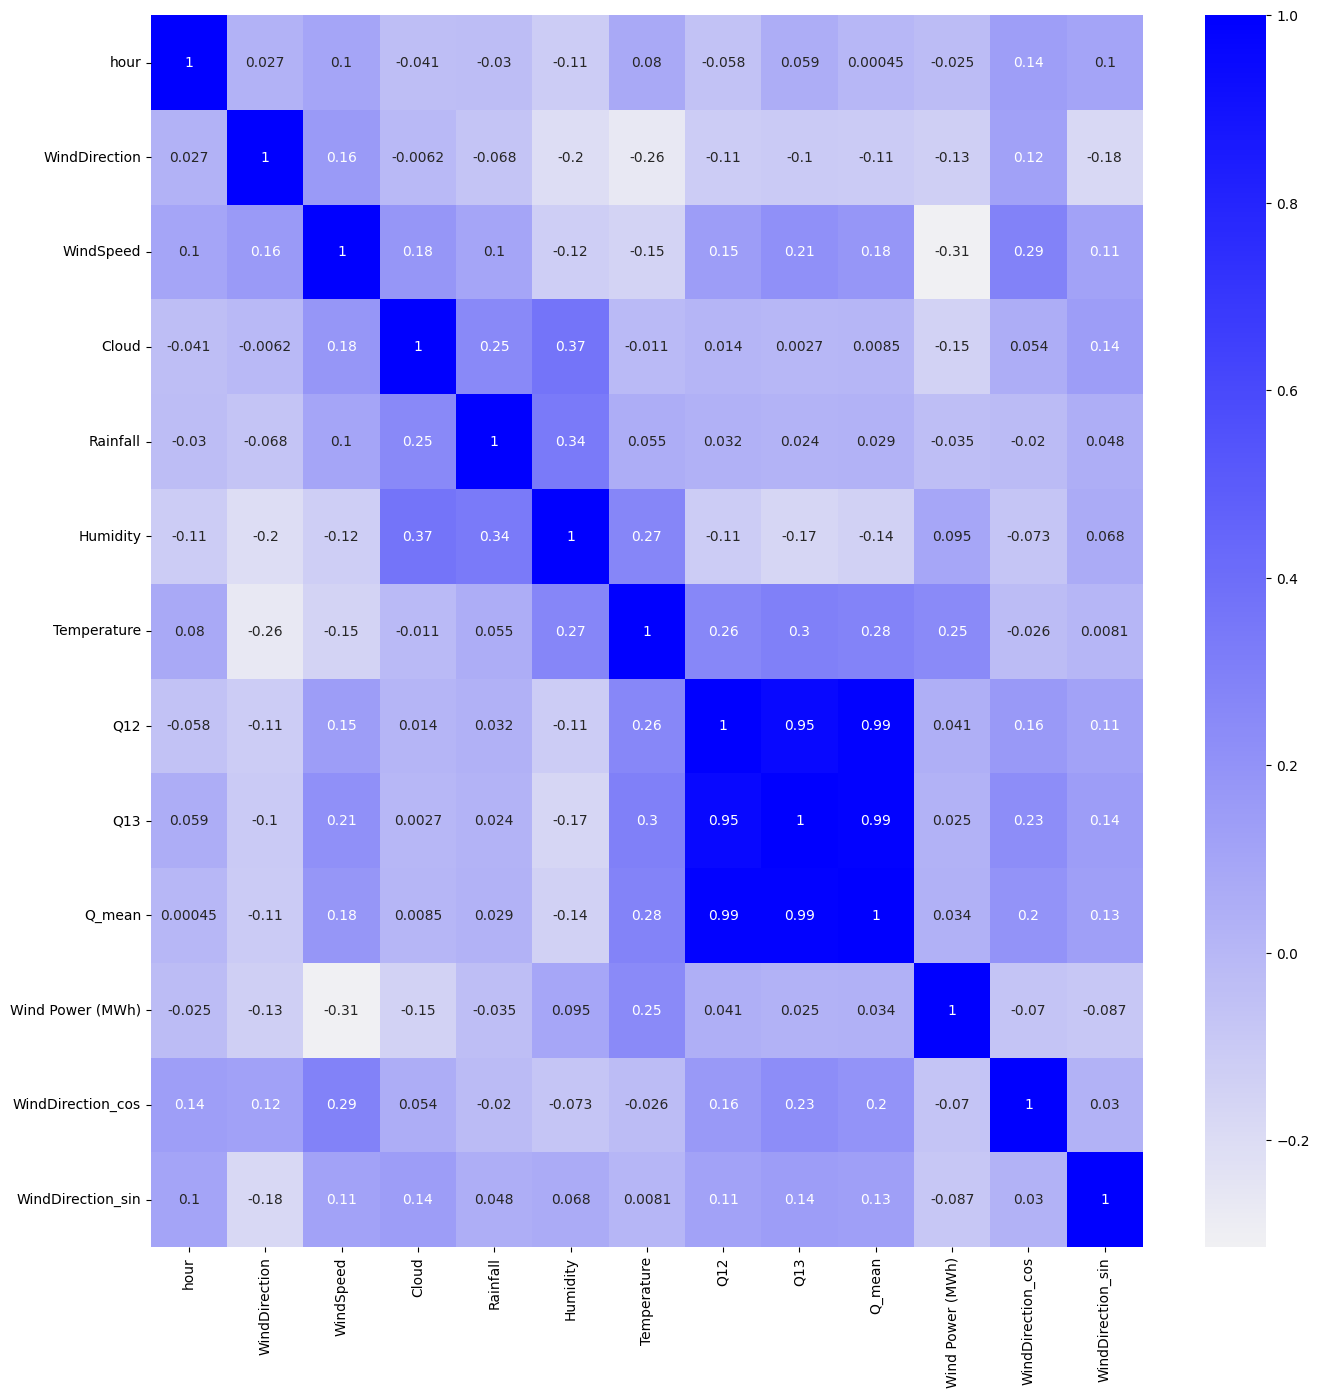

In [11]:
plt.figure(figsize=(16,16))
cmap = sns.light_palette(color = "b", as_cmap = True)
sns.heatmap(merged_df_jeju.corr(), annot = True, cmap = cmap)
plt.show()

Scaling

In [12]:
# columns_to_scale = ['WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q_mean']
# sd_scaler = StandardScaler()

# merged_df_jeju[columns_to_scale] = sd_scaler.fit_transform(merged_df_jeju[columns_to_scale])

Drop unnecessary columns

In [13]:
merged_df_jeju = merged_df_jeju.drop(columns = ['WindDirection', 'Q12', 'Q13', 'date'])

In [14]:
for column in merged_df_jeju.columns:
    print(column, merged_df_jeju[column].min(), merged_df_jeju[column].max())

hour 1 24
WindSpeed 0.0 13.7
Cloud 0.0 10.0
Rainfall 0.0 2.0
Humidity 14.0 100.0
Temperature -2.7 36.9
Q_mean 0.0 1283.1800811585308
Wind Power (MWh) 0.0 3175.4378949
WindDirection_cos -0.999020813314648 1.0
WindDirection_sin -0.9705280195418053 0.9802396594403116
Year 2021 2022
Month 01 12
Day 01 31


In [15]:
merged_df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour               17500 non-null  int64  
 1   WindSpeed          17500 non-null  float64
 2   Cloud              17500 non-null  float64
 3   Rainfall           17500 non-null  float64
 4   Humidity           17500 non-null  float64
 5   Temperature        17500 non-null  float64
 6   Q_mean             17500 non-null  float64
 7   Wind Power (MWh)   17500 non-null  float64
 8   WindDirection_cos  17500 non-null  float64
 9   WindDirection_sin  17500 non-null  float64
 10  Year               17500 non-null  object 
 11  Month              17500 non-null  object 
 12  Day                17500 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.7+ MB


Feature Selection

In [16]:
PCA_df = merged_df_jeju.drop(columns = ['Wind Power (MWh)', 'WindSpeed', 'WindDirection_cos', 'WindDirection_sin'])

# Using mRMR
# selected_features = pymrmr.mRMR(X_train, 'MIQ', 5)
# print('Selected Features via mRMR: ', selected_features)

# PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(PCA_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# X_train = pd.concat([merged_df_jeju[['WindSpeed', 'WindDirection_cos', 'WindDirection_sin']], principalDf], axis = 1)
# y_train = merged_df_jeju['Wind Power (MWh)']

X_train = merged_df_jeju[['WindSpeed', 'Rainfall', 'Cloud']]
y_train = merged_df_jeju['Wind Power (MWh)']

display(X_train)
display(y_train)

,WindSpeed,Rainfall,Cloud
0,6.1,0.0,9.0
1,5.6,0.0,9.0
2,5.5,0.0,10.0
3,5.4,0.0,10.0
4,4.2,0.0,10.0
...,...,...,...
17495,3.4,0.0,6.0
17496,2.9,0.0,7.0
17497,3.2,0.0,6.0
17498,1.9,0.0,3.0


0         91.822526
1         79.594526
2         93.165053
3         88.447579
4        154.077053
            ...    
17495     46.130526
17496     56.694737
17497     59.407368
17498     47.329474
17499     65.934737
Name: Wind Power (MWh), Length: 17500, dtype: float64

## Modeling

In [17]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam, lr_scheduler
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [18]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [19]:
X_train, y_train = X_train.to_numpy(dtype = np.float32), y_train.to_numpy(dtype = np.float32)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

print(len(X_train), len(X_val), len(X_test))

12250 2625 2625


In [20]:
# Dataset
class Windpower_Dataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __getitem__(self, index):
        return {
            'input': self.inputs[index],
            'label': self.outputs[index]
        }

    def __len__(self):
        return len(self.inputs)

In [21]:
# DataLoader
batch_size = 32
train_loader = DataLoader(Windpower_Dataset(X_train, y_train), batch_size = batch_size, shuffle = False,
                          drop_last = False, num_workers = 2, pin_memory = True)
val_loader = DataLoader(Windpower_Dataset(X_val, y_val), batch_size = batch_size, shuffle = False,
                        drop_last = False, num_workers = 2, pin_memory = True)
test_loader = DataLoader(Windpower_Dataset(X_test, y_test), batch_size = batch_size, shuffle = False,
                         drop_last = False, num_workers = 2, pin_memory = True)

In [27]:
class Windpower_MLP(nn.Module):
    def __init__(self):
        super(Windpower_MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3, 32), nn.ReLU(),# nn.Dropout(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.layers(x)

In [23]:
# Training
def train(model, optimizer, criterion, train_loader):
    model.train()
    train_loss = 0
    for step, data in enumerate(tqdm(train_loader)):
        inputs, labels = data['input'], data['label']
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()

    return {
        'train_loss': train_loss,
        'total': len(train_loader)
    }

In [24]:
# Validation
def val(model, criterion, val_loader):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for _, data in enumerate(tqdm(val_loader)):
            inputs, labels = data['input'], data['label']
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

    return {
        'val_loss': val_loss,
        'total': len(val_loader)
    }

In [25]:
# Test
def test(model, criterion, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for _, data in enumerate(tqdm(test_loader)):
            inputs, labels = data['input'], data['label']
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    return {
        'test_loss': test_loss,
        'total': len(test_loader)
    }

In [28]:
model = Windpower_MLP().to(DEVICE)

lr = 0.001
epochs = 40
optimizer = Adam(model.parameters(), lr = lr)
criterion = nn.MSELoss()
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

train_losses, val_losses, test_losses = [], [], []

for epoch in range(1, epochs + 1):
    # Train model
    print(f'Training Epoch {epoch}')
    train_info = train(model, optimizer, criterion, train_loader)
    train_loss = train_info['train_loss'] / train_info['total']
    train_losses.append(train_loss)

    # Validate model
    val_info = val(model, criterion, val_loader)
    val_loss = val_info['val_loss'] / val_info['total']
    val_losses.append(val_loss)

    # Test model
    test_info = test(model, criterion, test_loader)
    test_loss = test_info['test_loss'] / test_info['total']
    test_losses.append(test_loss)

    scheduler.step()


Training Epoch 1


  0%|          | 0/383 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 99%|█████████▊| 378/383 [00:01<00:00, 252.93it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 57%|█████▋    | 47/83 [00:00<00:00, 254.77it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 

Training Epoch 2


100%|██████████| 83/83 [00:00<00:00, 344.30it/s]


Training Epoch 3


100%|██████████| 83/83 [00:00<00:00, 171.86it/s]


Training Epoch 4


100%|██████████| 83/83 [00:00<00:00, 191.28it/s]


Training Epoch 5


100%|██████████| 83/83 [00:00<00:00, 186.23it/s]


Training Epoch 6


100%|██████████| 83/83 [00:00<00:00, 132.64it/s]


Training Epoch 7


100%|██████████| 83/83 [00:00<00:00, 204.02it/s]


Training Epoch 8


100%|██████████| 83/83 [00:00<00:00, 217.69it/s]


Training Epoch 9


100%|██████████| 83/83 [00:00<00:00, 348.00it/s]


Training Epoch 10


100%|██████████| 83/83 [00:00<00:00, 351.78it/s]


Training Epoch 11


100%|██████████| 83/83 [00:00<00:00, 251.10it/s]


Training Epoch 12


100%|██████████| 83/83 [00:00<00:00, 348.36it/s]


Training Epoch 13


100%|██████████| 83/83 [00:00<00:00, 329.23it/s]


Training Epoch 14


100%|██████████| 83/83 [00:00<00:00, 353.26it/s]


Training Epoch 15


100%|██████████| 83/83 [00:00<00:00, 342.00it/s]


Training Epoch 16


100%|██████████| 83/83 [00:00<00:00, 338.15it/s]


Training Epoch 17


100%|██████████| 83/83 [00:00<00:00, 341.01it/s]


Training Epoch 18


100%|██████████| 83/83 [00:00<00:00, 238.96it/s]


Training Epoch 19


100%|██████████| 83/83 [00:00<00:00, 326.57it/s]


Training Epoch 20


100%|██████████| 83/83 [00:00<00:00, 332.50it/s]


Training Epoch 21


100%|██████████| 83/83 [00:00<00:00, 337.30it/s]


Training Epoch 22


100%|██████████| 83/83 [00:00<00:00, 333.39it/s]


Training Epoch 23


100%|██████████| 83/83 [00:00<00:00, 330.76it/s]


Training Epoch 24


100%|██████████| 83/83 [00:00<00:00, 113.56it/s]


Training Epoch 25


100%|██████████| 83/83 [00:00<00:00, 187.30it/s]


Training Epoch 26


100%|██████████| 83/83 [00:00<00:00, 347.53it/s]


Training Epoch 27


100%|██████████| 83/83 [00:00<00:00, 347.07it/s]


Training Epoch 28


100%|██████████| 83/83 [00:00<00:00, 337.20it/s]


Training Epoch 29


100%|██████████| 83/83 [00:00<00:00, 349.19it/s]


Training Epoch 30


100%|██████████| 83/83 [00:00<00:00, 346.47it/s]


Training Epoch 31


100%|██████████| 83/83 [00:00<00:00, 211.79it/s]


Training Epoch 32


100%|██████████| 83/83 [00:00<00:00, 350.42it/s]


Training Epoch 33


100%|██████████| 83/83 [00:00<00:00, 323.50it/s]


Training Epoch 34


100%|██████████| 83/83 [00:00<00:00, 344.87it/s]


Training Epoch 35


100%|██████████| 83/83 [00:00<00:00, 347.20it/s]


Training Epoch 36


100%|██████████| 83/83 [00:00<00:00, 324.85it/s]


Training Epoch 37


100%|██████████| 83/83 [00:00<00:00, 334.73it/s]


Training Epoch 38


100%|██████████| 83/83 [00:00<00:00, 222.13it/s]


Training Epoch 39


100%|██████████| 83/83 [00:00<00:00, 323.94it/s]


Training Epoch 40


100%|██████████| 83/83 [00:00<00:00, 327.42it/s]


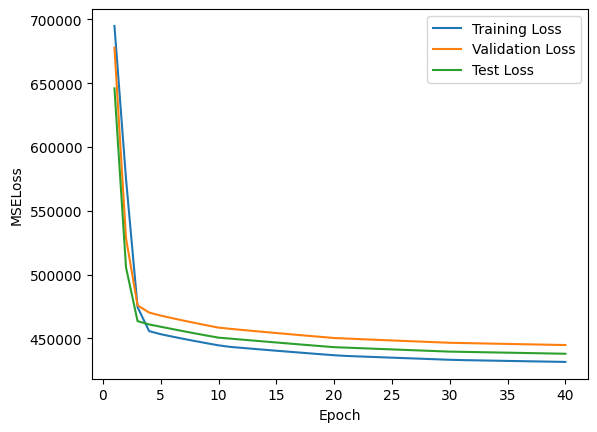

In [29]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label = 'Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label = 'Validation Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label = 'Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.show()

In [30]:
for _, data in enumerate(tqdm(test_loader)):
    inputs, labels = data['input'], data['label']
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

    outputs = model(inputs)
    print(f'labels: {labels}')
    print(f'outputs: {outputs}')

 19%|█▉        | 16/83 [00:00<00:00, 68.99it/s]

labels: tensor([  59.0621, 1081.6069, 2574.0205,   39.2893,   21.6253, 2780.6851,
         134.0829,  109.8587,  580.1208,   34.6463,  877.3076,  383.2010,
          82.3032,  208.0284,  348.5941,  551.9188,  114.2145, 2101.2195,
          42.8665,   50.8838,   49.4326,   18.9000, 1186.5985,  157.0438,
         574.7074,   46.8600,  446.9179,  890.4501,  323.2337, 1798.2023,
         565.4642, 1819.4158], device='cuda:0')
outputs: tensor([[734.6694],
        [498.2994],
        [412.1316],
        [354.5110],
        [519.1240],
        [497.9873],
        [634.5347],
        [698.2567],
        [511.9542],
        [276.4912],
        [414.8116],
        [561.7094],
        [648.1894],
        [634.5347],
        [543.5031],
        [264.2595],
        [698.2567],
        [585.3910],
        [607.8495],
        [480.4053],
        [614.0046],
        [666.3956],
        [520.6669],
        [566.8853],
        [426.4106],
        [716.4631],
        [416.6407],
        [459.7943],
     

 54%|█████▍    | 45/83 [00:00<00:00, 112.81it/s]

labels: tensor([ 370.2200,  499.7615,  390.6488, 2649.8384,  127.7505, 1892.1395,
          34.2916,   91.7339,  362.7408,  722.4036,  103.5432,   83.3760,
         713.2095,  232.5120,  918.4153,  475.1650,   28.1400,   95.6874,
         381.4960,   44.9716,  567.8335,  584.9316, 1579.4736,  434.6389,
          12.9747,  527.4360,   40.9937, 1130.1777,  299.0017,  771.3897,
          56.1604,    6.4800], device='cuda:0')
outputs: tensor([[468.9398],
        [493.7478],
        [570.8510],
        [373.4872],
        [702.8083],
        [356.0540],
        [530.7836],
        [470.6779],
        [271.2899],
        [466.7505],
        [470.4829],
        [307.6992],
        [297.0105],
        [290.2661],
        [507.4026],
        [437.4459],
        [341.9932],
        [657.6046],
        [333.7057],
        [830.3446],
        [492.6791],
        [333.4196],
        [437.4459],
        [521.3695],
        [478.7704],
        [466.7505],
        [281.6926],
        [565.3636],
     

 87%|████████▋ | 72/83 [00:00<00:00, 123.54it/s]

outputs: tensor([[548.6790],
        [461.6234],
        [302.4978],
        [359.7123],
        [503.1632],
        [475.5415],
        [511.8074],
        [480.4053],
        [394.0063],
        [440.0654],
        [390.9202],
        [634.8467],
        [281.6926],
        [302.4978],
        [457.9595],
        [397.5849],
        [444.3048],
        [733.3488],
        [458.2512],
        [416.6832],
        [387.2619],
        [703.9700],
        [643.9499],
        [326.6753],
        [506.8921],
        [632.9808],
        [430.6501],
        [483.9717],
        [408.0672],
        [535.3364],
        [307.6992],
        [643.9499]], device='cuda:0', grad_fn=<AddmmBackward0>)
labels: tensor([1016.6636, 1320.6166,  362.6187,  103.7640, 1614.3219,   34.1884,
         476.9846,  435.4564,  481.9653,  470.4644,   30.3196,   92.7990,
          41.8305,  254.1484,  406.2168, 1256.1494,   31.1499,  331.5796,
          92.3305,   53.4947,  193.5354,  598.5027, 1288.2286,   27.9091,
   

100%|██████████| 83/83 [00:00<00:00, 104.71it/s]
